In [8]:
# Q-6: Consider the total number of collisions each year from 2013-2018. 
# * Is there an apparent trend? 
# * Fit a linear regression for the number of collisions per year and report its slope.

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [10]:
def dataFram3NYC(FILE_NAME = 'NYPD_Motor_Vehicle_Collisions.csv', use_parent_dir = False):
    """
    READS ~1,5 MILLION ROW CSV FILE, RETURNS MASTER DATAFRAME
    use_parent_dir will use parent directory as base directory
    """
    if use_parent_dir == True:
        CURRENTWRK_DIR = os.getcwd()
        BASE_DIR = os.path.dirname(CURRENTWRK_DIR)
    elif use_parent_dir == False:
        BASE_DIR = os.getcwd()
        
#     STATIC_FOLDER = os.path.dirname(BASE_DIR)
    STATIC_FOLDER = ''
    # FILE_NAME = 'NYPD_Motor_Vehicle_Collisions.csv'
    PATH_COMPILED = os.path.join( BASE_DIR, STATIC_FOLDER, FILE_NAME)
    print('\n> > > > dataFrameNYC() now reading csv with file path below')
    print(PATH_COMPILED)
    print()
    _df = pd.read_csv(PATH_COMPILED, encoding = "iso-8859-1", low_memory = False)
    col_list = list(_df.columns)
    col_ind3x = np.arange(len(col_list))
    col_dict = dict(zip( col_ind3x, col_list))
    print(col_dict)
    return _df

In [11]:
def focusDataframer(columns2keep_list = [0,23]):
    """
    MODIFIED DATA FRAMER, PRINTS OUT ALL COLUMN INDEX/NAMES, 
    REQUIRES A LIST OF REQUESTED COLUMN INDEXES AS INTEGERS
    RETURNS A DATAFRAME WITH ONLY USER-SELECTED COLUMNS
    """
    pass
    raw_df = dataFram3NYC(use_parent_dir=True)
    col_list = list(raw_df.columns)
    col_ind3x = np.arange(len(col_list))
    col_dict = dict(zip( col_ind3x, col_list))
    col_final = []
    for index in columns2keep_list:
        add_this_column = col_dict[index]
        col_final.append(add_this_column)
    col_final = [
        str(index)
        for index in col_final
    ]
    _df = raw_df[
        col_final
    ]
    print()
    print('> > > focusDataframer(columns2keep_list = [indexNo_as_int00, indexNo_as_int01]')
    print('> > >                * selected columns:')
    for selected_col,keepthis in zip(columns2keep_list,col_final):
        print('> > >                                  ', selected_col,' keeps ', keepthis)
    return _df

In [12]:
def solution06of08():

    def gr0upYearByCollusionCount(focus_df = focusDataframer([0,23])):
        """
        REQUIRES A DATAFRAME WITH A TARGET FIELD NAMED 'DATE',
        GROUP YEAR BY COLLUSION COUNT
        """
        pass
        print()
        print('> > > > gr0upYearByCollusionCount() calculated collusion count under year: ')
        focus_df['ye4r'] = [date[-4:] for date in focus_df['DATE']]
        gr0uped_df = focus_df.groupby('ye4r').count().drop(columns = 'DATE')
        gr0uped_df['c0llusionCount'] = [
            collusionCount
            for collusionCount in gr0uped_df['UNIQUE KEY']
        ]
        gr0uped_df = gr0uped_df.drop(columns='UNIQUE KEY')
        check_row_total = gr0uped_df.sum()[0]
        print('> > > > check if sum of all yearly collusion counts add up total row number {:,}'.format(check_row_total))
        print('> > > >                                                                     1,487,383 expected []')
        return gr0uped_df
    # ----------------- 1487383
    gr0upYearByCollusionCount()

    def yearLabeledCollusionCountDF(gr0uped_df = gr0upYearByCollusionCount(), 
                                 year_first = 2013, 
                                 year_last =  2018):
        """
        REQUIRES GROUPED DATAFRAME WITH YEAR ON INDEX AND COLLUSION COUNT AS VALUES
        """
        pass
        print()
        print('> > > yearLabeledCollusionCountDF() returns a _df with below years on label: ')
        year_last += 1
        yrs_list = [int(year) for year in np.arange(int(year_first), int(year_last))]
        print(yrs_list)
        yearLabel_df = gr0uped_df.T
        yearStr_list = [str(year) for year in yrs_list]
        return yearLabel_df[yearStr_list].T

    def snsRegressionPlot(df = yearLabeledCollusionCountDF().T, yTarget='c0llusionCount',gr0up_df=yearLabeledCollusionCountDF()):
        """df is a pivoted dataframe,
        yTarget is the value to be predicted
        ----default is 'United States'
        returns plot with regression
        """
        c0lorList=['coral', 'goldenrod', 'salmon', 'orangered', 'darkolivegreen', 'olivedrab',
                   'cadetblue', 'palevioletred', 'mediumorchid', 'darkorange', 'teal', 'cyan', 'aqua']

        plt.rcParams["font.size"] = 12

        _colList_ = df.columns
        plt.figure(figsize = (12,8))        
        plt.title('Q6 - NO-OF-COLLUSIONS vs YEAR: TREND ANALYSIS')
        plt.xlabel('YEAR ')
        plt.ylabel('NUMBER OF COLLUSIONS')
        int_for_x_axis = [
            int(year)
            for year in gr0up_df.index
                         ]
        x_axis = pd.Series(int_for_x_axis)
        y_axis = pd.Series(gr0up_df[yTarget])
        rand1nt = np.random.randint(0,len(c0lorList))
        c0lor = c0lorList[rand1nt] 
        sns.regplot(y=y_axis, x=x_axis, data=df, fit_reg = True, color= c0lor, marker='o')
        plt.grid(True)
        plt.show()
        return None

    snsRegressionPlot()
    # hit ctrl+enter for jedi lightsaber experience lol

    # Q-6: Consider the total number of collisions each year from 2013-2018. 
    # * Is there an apparent trend? 
    # * Fit a linear regression for the number of collisions per year and report its slope.
    return None


> > > > dataFrameNYC() now reading csv with file path below
C:\Users\DENVER\Desktop\interviewPY\INT_03_PYTHON_PANDAS_NYC_COLLISION\NYPD_Motor_Vehicle_Collisions.csv

{0: 'DATE', 1: 'TIME', 2: 'BOROUGH', 3: 'ZIP CODE', 4: 'LATITUDE', 5: 'LONGITUDE', 6: 'LOCATION', 7: 'ON STREET NAME', 8: 'CROSS STREET NAME', 9: 'OFF STREET NAME', 10: 'NUMBER OF PERSONS INJURED', 11: 'NUMBER OF PERSONS KILLED', 12: 'NUMBER OF PEDESTRIANS INJURED', 13: 'NUMBER OF PEDESTRIANS KILLED', 14: 'NUMBER OF CYCLIST INJURED', 15: 'NUMBER OF CYCLIST KILLED', 16: 'NUMBER OF MOTORIST INJURED', 17: 'NUMBER OF MOTORIST KILLED', 18: 'CONTRIBUTING FACTOR VEHICLE 1', 19: 'CONTRIBUTING FACTOR VEHICLE 2', 20: 'CONTRIBUTING FACTOR VEHICLE 3', 21: 'CONTRIBUTING FACTOR VEHICLE 4', 22: 'CONTRIBUTING FACTOR VEHICLE 5', 23: 'UNIQUE KEY', 24: 'VEHICLE TYPE CODE 1', 25: 'VEHICLE TYPE CODE 2', 26: 'VEHICLE TYPE CODE 3', 27: 'VEHICLE TYPE CODE 4', 28: 'VEHICLE TYPE CODE 5'}

> > > focusDataframer(columns2keep_list = [indexNo_as_int00

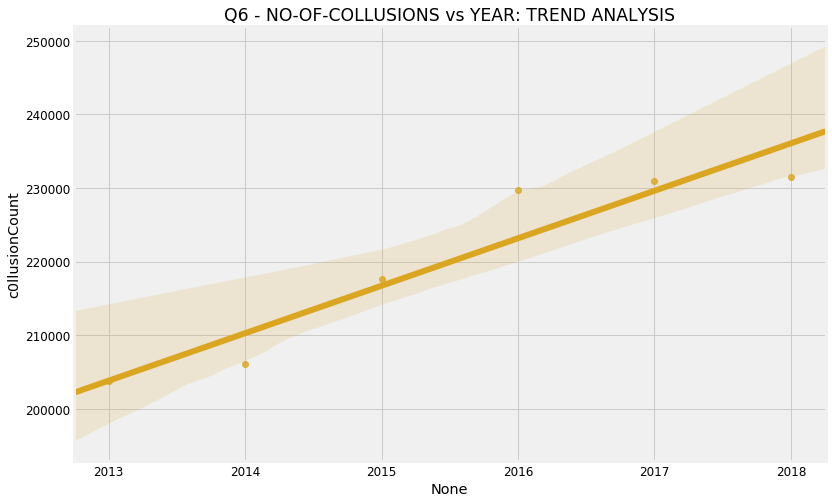

In [13]:
solution06of08()